## REDES NEURONALES ARTIFICIALES

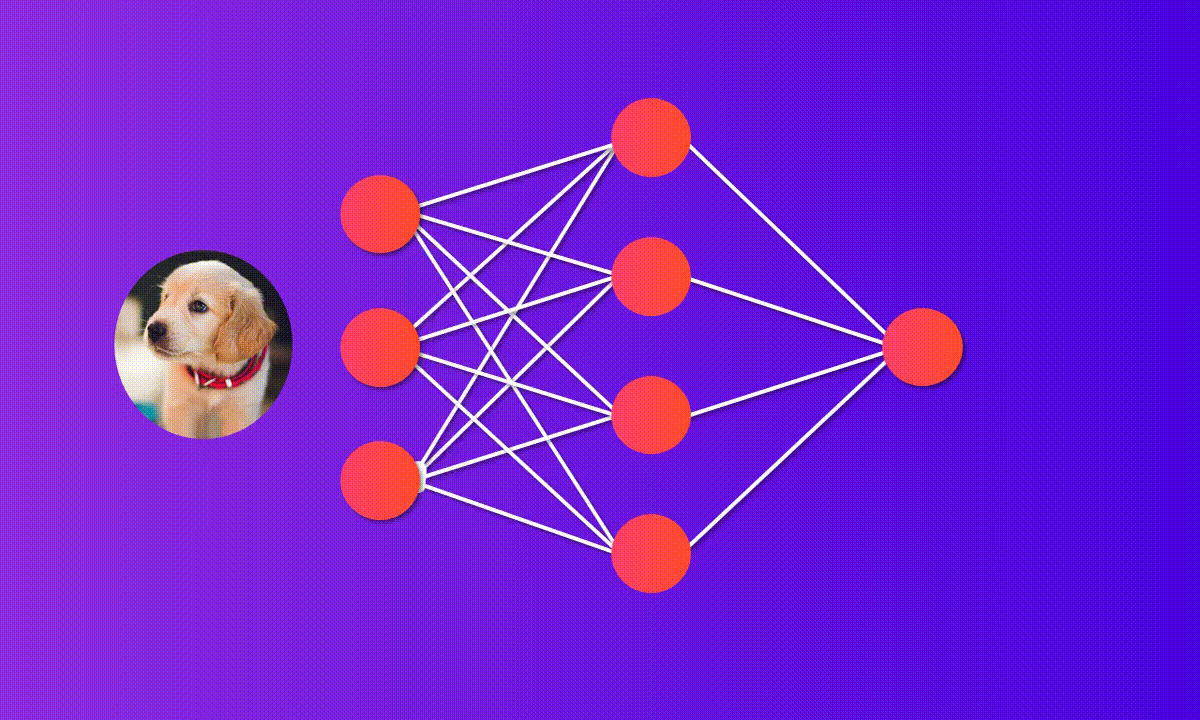

# UN PEQUEÑO REPASO DE REDES NEURONALES 
Las redes neuronales artificiales se basan en las neuronas 
Una neurona es una celula que forma parte del sistema nervioso, su funcion principal es :
* Recibir
* Procesar
* Transmitir
Toda la informacion atraves de señales quimicas y electricas, cada una de ellas tiene informacion necesaria para por ejemplo poder:
* Caminar
* Respirar
Pero estas capacidades se logran cuando las neuronas arrojan este impulso al cerebro
##  PARTES DE NEURONAS
* Axon : Permite conectarse con otras neuronas para intercambiar informacion
* Red Neuronal : Enlaces de neuronas, permitiendo procesar informacion (clasificar, actuar)

## COMO TRABAJA LA RED NEURONAL
Toda la informacion de una red neuronal pasa por capas las cuales son :
* CAPA DE ENTRADA : Todo lo que se ve o recibe del exterior
* CAPA OCULTA : Se manejan los margenes o rangos, es como los limites
* CAPA DE SALIDA : Los resultados del procesamiento de la informacion


    

# DEFINIENDO RED NEURONAL



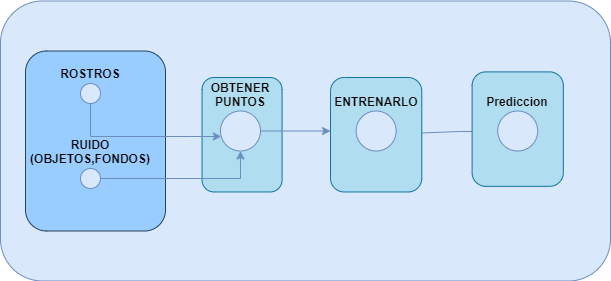

El esquema en el que nos enfocaremos sera primeramente obteniendo rostros, con un algoritmo que reconozca solo rostros sin objetos(ruidos), despues se obtiene puntos de cada rostro y con esto entrenaremos el modelo empezando a comparar con cualquier objeto o rostro y cada acertamiento sera guardado de manera que se vea si un rostro es de una persona especifica o no

# CAPA DE ENTRADA: Rostros (fotos, videos)

# OPEN CV DATA
Open cv ya tiene un repositorio git en el cual se maneja objetos lo cual nos facilitara el no agregar uno por uno
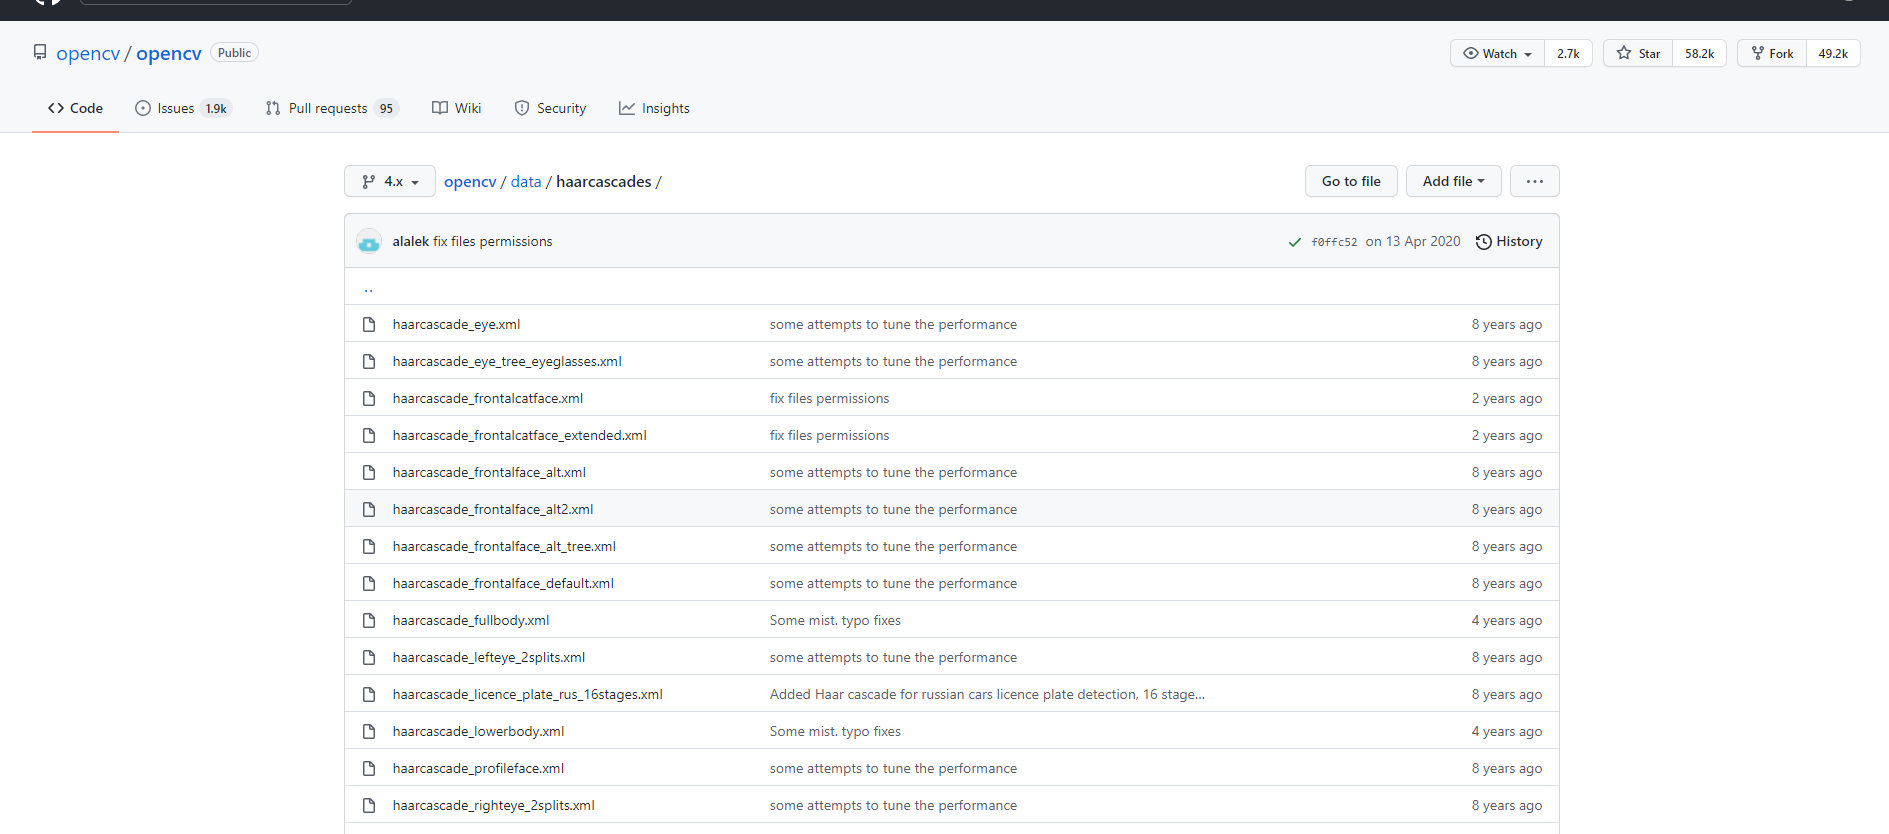

Todos los datos del archivo son numeros de un machine learning donde se manejan numeros discriminatorios aplicado a objetos con un contorno distinto a rostros como por ejemplo laptops, mesas

El modelo de entrenamiento que se usara sera 
haarcascade_frontalface_default
Debido a que nos enfocaremos en rostros de frente

In [14]:
import cv2 as cv
import os #Crea archivos y carpetas
import numpy as np
from time import time

# CascadeClassifier
Es un metodo de entrenamiento que ofrece la libreria opencv que permite cargar modelos previamente entrenados, esto nos sirve para tener ya un modelo que pueda descartar todo el ruido que no sean rostros 

In [15]:
# Clasificador de cascada
ruidos=cv.CascadeClassifier(r'C:\Users\LEGION\Sis_inte\Expo\ReconocimientoFacial\IntroduccionReconocimientoImagenes\Entrenamientos_opencv_ruido\opencv-4.x\opencv-4.x\data\haarcascades\haarcascade_frontalface_default.xml')

# DETECTEDMULTISCALER
##  II PARAMETRO 
Reduce imagenes
Es una funcion que compara imagen de ruidos con el rostro pide un factor de escala que maneja porcentajes el cual hace que marque los rostros, se debe jugar con este porcentaje ya que un porcentaje alto hace que enmarque todo incluyendo otras cosas que no sean rostros y tambien si es muy pequeño no enmarcara nada

1.5 -> Representa el 50% de uno


1.3 -> Representa el 30% de uno
## III PARAMETRO MIN NEIGHBORS
Reduce cantidad de contornos promedio que encontrara
Promedia el contorno entre ese numero
Cada que se reconoce un rostro lo enmarca en un cuadrado, lo reduce y marca en recuadro, cada toma lo recorrera y buscara imagen, si encuentra un mismo rostro mejorara su error

In [16]:
#Probando deteccion facial en un video
camara=cv.VideoCapture(0)
id=0
while True: #Si camara es true
    _,captura=camara.read()
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY) #Convertir a escala de grises
    cara=ruidos.detectMultiScale(grises,1.3,5) #Obtener caras, pide imagen con ruidos para compararlo con grises
    id_captura=grises.copy() #Copia todas las propiedades de la captura (escala de grises)
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4) # enmarca el rostro con un color especifico
    #Bucle para cada pixel de la foto o video y ver en que cuadro hay rostros
    cv.imshow("Resultado rostro",captura)
    if cv.waitKey(1)==ord('s'):
        break
camara.release()
cv.destroyAllWindows()

# Creamos carpetas donde capturamos mayor cantidad de imagenes para que sirva como un patron de imagenes 

In [7]:
#Usando modelo propio
#Abriendo camara
modelo='FotosJL'
ruta1='C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes'
ruta_completa=ruta1+'/'+modelo
if not os.path.exists(ruta_completa):
    os.makedirs(ruta_completa)
camara=cv.VideoCapture(0)
id=0
while True: #Si camara es true
    respuesta,captura=camara.read()
    if respuesta==False:
        break
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY) #Convertir a escala de grises
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    id_captura=grises.copy() #Copia todas las propiedades de la captura (escala de grises)
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4) # enmarca el rostro con un color especifico
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        cv.imwrite(ruta_completa+'/imagen_{}.jpg'.format(id),rostro_capturado)
        id=id+1
    
    #Bucle para cada pixel de la foto o video y ver en que cuadro hay rostros
    if id==350:
        break
camara.release()
cv.destroyAllWindows()

# Capturando otro entrenamiento ya con otros datos de rostros

In [17]:
#Usando de modelo a AuronPlay
modelo='AuronPlay'
ruta1='C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data'
ruta_completa=ruta1+'/'+modelo
if not os.path.exists(ruta_completa):
    os.makedirs(ruta_completa)
camara=cv.VideoCapture('videoauron.mp4')
id=0
while True: #Si camara es true
    respuesta,captura=camara.read()
    if respuesta==False:
        break
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY) #Convertir a escala de grises
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    id_captura=grises.copy() #Copia todas las propiedades de la captura (escala de grises)
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4) # enmarca el rostro con un color especifico
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        cv.imwrite(ruta_completa+'/imagen_{}.jpg'.format(id),rostro_capturado)
        id=id+1
    
    #Bucle para cada pixel de la foto o video y ver en que cuadro hay rostros

    if id==350:
        break
camara.release()
cv.destroyAllWindows()

In [18]:
#Usnado de modelo a ElonMusk
modelo='ElonMusk'
ruta1='C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data'
ruta_completa=ruta1+'/'+modelo
if not os.path.exists(ruta_completa):
    os.makedirs(ruta_completa)
camara=cv.VideoCapture('ElonMusk.mp4')
id=0
while True: #Si camara es true
    respuesta,captura=camara.read()
    if respuesta==False:
        break
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY) #Convertir a escala de grises
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    id_captura=grises.copy() #Copia todas las propiedades de la captura (escala de grises)
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4) # enmarca el rostro con un color especifico
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        cv.imwrite(ruta_completa+'/imagen_{}.jpg'.format(id),rostro_capturado)
        id=id+1
    
    #Bucle para cada pixel de la foto o video y ver en que cuadro hay rostros
    if id==350:
        break
camara.release()
cv.destroyAllWindows()

# ENTRENAR INTELIGENCIA ARTIFICIAL 
# CAPA OCULTA (ENTRENAMIENTO)

In [19]:
#Pasando ruta donde hay fotos para entrenar con estas, pasando carpeta por carpeta
data_ruta="C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data"
#Recorrer carpeta por carpeta
lista_data=os.listdir(data_ruta)
print('data',lista_data)

data ['AuronPlay', 'ElonMusk']


# EIGEN FACE RECOGNIZER OPENCV
Modelado que sirve para hacer reconocimiento facial, incluyendo la escalacion de grises, y todo el pre procesamiento de la imagen para que se la trabaje en un solo modelado

In [20]:
#Darle etiquetas a todas las fotos de manera que tengan un id unico
ids=[]
rostros_data=[]
id=0
tiempo_inicial=time()
#Recorrer todos los archivos y darles las etiquetas
for fila in lista_data:
    ruta_completa=data_ruta+'/'+fila #Entrando a sub carpetas
    print("Iniciando lectura...")
    for archivo in os.listdir(ruta_completa):#Recorriendo archivo por archivo subcarpeta
        print("Imagen: ",fila+'/'+archivo)
        ids.append(id) #etiquetas
        rostros_data.append(cv.imread(ruta_completa+'/'+archivo,0))#Convirtiendo a escala de grises

    id=id+1 #Para cada carpeta distinto id 
    tiempo_final_lectura=time()
    tiempo_total_lectura=tiempo_final_lectura-tiempo_inicial
    print("Tiempo total de lectura: ",tiempo_total_lectura)
entrenamiento_eigen_recognizer=cv.face.EigenFaceRecognizer_create()
#Definiendo con los datos que trabajara
print("INICIANDO ENTRENAMIENTO...")
entrenamiento_eigen_recognizer.train(rostros_data,np.array(ids))
#Guardar entrenamiento Similar a crear neuronas para ser comparadas con otros datos
tiempo_final_entrenamiento=time()
tiempo_total_entrenamiento=tiempo_final_entrenamiento-tiempo_total_lectura
print("Tiempo entrenamiento total: ",tiempo_total_entrenamiento)
entrenamiento_eigen_recognizer.write('entrenamiento_eigen_recognizer.xml')
print("ENTRENAMIENTO FINALIZADO...")

Iniciando lectura...
Imagen:  AuronPlay/imagen_0.jpg
Imagen:  AuronPlay/imagen_1.jpg
Imagen:  AuronPlay/imagen_10.jpg
Imagen:  AuronPlay/imagen_100.jpg
Imagen:  AuronPlay/imagen_101.jpg
Imagen:  AuronPlay/imagen_102.jpg
Imagen:  AuronPlay/imagen_103.jpg
Imagen:  AuronPlay/imagen_104.jpg
Imagen:  AuronPlay/imagen_105.jpg
Imagen:  AuronPlay/imagen_106.jpg
Imagen:  AuronPlay/imagen_107.jpg
Imagen:  AuronPlay/imagen_108.jpg
Imagen:  AuronPlay/imagen_109.jpg
Imagen:  AuronPlay/imagen_11.jpg
Imagen:  AuronPlay/imagen_110.jpg
Imagen:  AuronPlay/imagen_111.jpg
Imagen:  AuronPlay/imagen_112.jpg
Imagen:  AuronPlay/imagen_113.jpg
Imagen:  AuronPlay/imagen_114.jpg
Imagen:  AuronPlay/imagen_115.jpg
Imagen:  AuronPlay/imagen_116.jpg
Imagen:  AuronPlay/imagen_117.jpg
Imagen:  AuronPlay/imagen_118.jpg
Imagen:  AuronPlay/imagen_119.jpg
Imagen:  AuronPlay/imagen_12.jpg
Imagen:  AuronPlay/imagen_120.jpg
Imagen:  AuronPlay/imagen_121.jpg
Imagen:  AuronPlay/imagen_122.jpg
Imagen:  AuronPlay/imagen_123.jpg


Imagen:  AuronPlay/imagen_347.jpg
Imagen:  AuronPlay/imagen_348.jpg
Imagen:  AuronPlay/imagen_349.jpg
Imagen:  AuronPlay/imagen_35.jpg
Imagen:  AuronPlay/imagen_36.jpg
Imagen:  AuronPlay/imagen_37.jpg
Imagen:  AuronPlay/imagen_38.jpg
Imagen:  AuronPlay/imagen_39.jpg
Imagen:  AuronPlay/imagen_4.jpg
Imagen:  AuronPlay/imagen_40.jpg
Imagen:  AuronPlay/imagen_41.jpg
Imagen:  AuronPlay/imagen_42.jpg
Imagen:  AuronPlay/imagen_43.jpg
Imagen:  AuronPlay/imagen_44.jpg
Imagen:  AuronPlay/imagen_45.jpg
Imagen:  AuronPlay/imagen_46.jpg
Imagen:  AuronPlay/imagen_47.jpg
Imagen:  AuronPlay/imagen_48.jpg
Imagen:  AuronPlay/imagen_49.jpg
Imagen:  AuronPlay/imagen_5.jpg
Imagen:  AuronPlay/imagen_50.jpg
Imagen:  AuronPlay/imagen_51.jpg
Imagen:  AuronPlay/imagen_52.jpg
Imagen:  AuronPlay/imagen_53.jpg
Imagen:  AuronPlay/imagen_54.jpg
Imagen:  AuronPlay/imagen_55.jpg
Imagen:  AuronPlay/imagen_56.jpg
Imagen:  AuronPlay/imagen_57.jpg
Imagen:  AuronPlay/imagen_58.jpg
Imagen:  AuronPlay/imagen_59.jpg
Imagen:  

Imagen:  ElonMusk/imagen_268.jpg
Imagen:  ElonMusk/imagen_269.jpg
Imagen:  ElonMusk/imagen_27.jpg
Imagen:  ElonMusk/imagen_270.jpg
Imagen:  ElonMusk/imagen_271.jpg
Imagen:  ElonMusk/imagen_272.jpg
Imagen:  ElonMusk/imagen_273.jpg
Imagen:  ElonMusk/imagen_274.jpg
Imagen:  ElonMusk/imagen_275.jpg
Imagen:  ElonMusk/imagen_276.jpg
Imagen:  ElonMusk/imagen_277.jpg
Imagen:  ElonMusk/imagen_278.jpg
Imagen:  ElonMusk/imagen_279.jpg
Imagen:  ElonMusk/imagen_28.jpg
Imagen:  ElonMusk/imagen_280.jpg
Imagen:  ElonMusk/imagen_281.jpg
Imagen:  ElonMusk/imagen_282.jpg
Imagen:  ElonMusk/imagen_283.jpg
Imagen:  ElonMusk/imagen_284.jpg
Imagen:  ElonMusk/imagen_285.jpg
Imagen:  ElonMusk/imagen_286.jpg
Imagen:  ElonMusk/imagen_287.jpg
Imagen:  ElonMusk/imagen_288.jpg
Imagen:  ElonMusk/imagen_289.jpg
Imagen:  ElonMusk/imagen_29.jpg
Imagen:  ElonMusk/imagen_290.jpg
Imagen:  ElonMusk/imagen_291.jpg
Imagen:  ElonMusk/imagen_292.jpg
Imagen:  ElonMusk/imagen_293.jpg
Imagen:  ElonMusk/imagen_294.jpg
Imagen:  Elon

# CAPA DE SALIDA

EL ARCHIVO ENTRENAMIENTO SON NUMEROS DE MATRICES DE 0 1 Y 2 DEBIDO A LAS CARPETAS SALIDAS

In [18]:
#PROBANDO CON CAMARA
#Pasando ruta donde hay fotos para entrenar con estas, pasando carpeta por carpeta
data_ruta="C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data"
#Recorrer carpeta por carpeta
lista_data=os.listdir(data_ruta)
#Creamos modelo
entrenamiento_eigen_recognizer=cv.face.EigenFaceRecognizer_create()
#Cargamos modelo de entrenamiento 
entrenamiento_eigen_recognizer.read('entrenamiento_eigen_recognizer.xml')
#Cargamos ruidos para que pueda discriminar y solo visualice rostros 
ruidos=cv.CascadeClassifier(r'C:\Users\LEGION\Sis_inte\Expo\ReconocimientoFacial\IntroduccionReconocimientoImagenes\Entrenamientos_opencv_ruido\opencv-4.x\opencv-4.x\data\haarcascades\haarcascade_frontalface_default.xml')
camara=cv.VideoCapture(0)
while True:
    _,captura=camara.read()
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY)#Pasar a escala de grises
    id_captura=grises.copy()
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        resultado=entrenamiento_eigen_recognizer.predict(rostro_capturado)
        #La prediccion es de acuerdo al rostro capturado, el modelo va a predecir con la imagen en vivo
        cv.putText(captura,'{}'.format(resultado),(x,y-5),1,1.3,(0,255,0),1,cv.LINE_AA)
        #(x,y-5)donde se ubica el texto#
        #1.1.3 Escala de letras 
        #(0,255,0) = Color
        #1=Grosor
        #cv.LINE_AA=Figura
        #Mostrando nombre del rostro,debido a que 0 es etiqueta y 1 prediccion
        if resultado[1]<9000: #Encontro el rostro
            #Busca la etiqueta de prediccion
            cv.putText(captura,'{}'.format(lista_data[resultado[0]]),(x,y-20),2,0.7,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
        else:
            cv.putText(captura,"No encontrado",(x,y-20),2,1.1,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
            
        
    cv.imshow("Resultados",captura)
    if(cv.waitKey(1)==ord('s')):
        break
camara.release()
cv.destroyAllWindows()

In [21]:
#PROBANDO CON VIDEO DE AURON
#Pasando ruta donde hay fotos para entrenar con estas, pasando carpeta por carpeta
data_ruta="C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data"
#Recorrer carpeta por carpeta
lista_data=os.listdir(data_ruta)
#Creamos modelo
entrenamiento_eigen_recognizer=cv.face.EigenFaceRecognizer_create()
#Cargamos modelo de entrenamiento 
entrenamiento_eigen_recognizer.read('entrenamiento_eigen_recognizer.xml')
#Cargamos ruidos para que pueda discriminar y solo visualice rostros 
ruidos=cv.CascadeClassifier(r'C:\Users\LEGION\Sis_inte\Expo\ReconocimientoFacial\IntroduccionReconocimientoImagenes\Entrenamientos_opencv_ruido\opencv-4.x\opencv-4.x\data\haarcascades\haarcascade_frontalface_default.xml')
camara=cv.VideoCapture('videoauron.mp4')
while True:
    _,captura=camara.read()
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY)#Pasar a escala de grises
    id_captura=grises.copy()
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        resultado=entrenamiento_eigen_recognizer.predict(rostro_capturado)
        #La prediccion es de acuerdo al rostro capturado, el modelo va a predecir con la imagen en vivo
        cv.putText(captura,'{}'.format(resultado),(x,y-5),1,1.3,(0,255,0),1,cv.LINE_AA)
        #(x,y-5)donde se ubica el texto#
        #1.1.3 Escala de letras 
        #(0,255,0) = Color
        #1=Grosor
        #cv.LINE_AA=Figura
        #Mostrando nombre del rostro,debido a que 0 es etiqueta y 1 prediccion
        if resultado[1]<8000: #Encontro el rostro
            #Busca la etiqueta de prediccion
            cv.putText(captura,'{}'.format(lista_data[resultado[0]]),(x,y-20),2,0.7,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
        else:
            cv.putText(captura,"No encontrado",(x,y-20),2,1.1,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
            
        
    cv.imshow("Resultados",captura)
    if(cv.waitKey(1)==ord('s')):
        break
camara.release()
cv.destroyAllWindows()

In [22]:
#PROBANDO CON VIDEO DE ELON
#Pasando ruta donde hay fotos para entrenar con estas, pasando carpeta por carpeta
data_ruta="C:/Users/LEGION/Sis_inte/Expo/ReconocimientoFacial/IntroduccionReconocimientoImagenes/Data"
#Recorrer carpeta por carpeta
lista_data=os.listdir(data_ruta)
#Creamos modelo
entrenamiento_eigen_recognizer=cv.face.EigenFaceRecognizer_create()
#Cargamos modelo de entrenamiento 
entrenamiento_eigen_recognizer.read('entrenamiento_eigen_recognizer.xml')
#Cargamos ruidos para que pueda discriminar y solo visualice rostros 
ruidos=cv.CascadeClassifier(r'C:\Users\LEGION\Sis_inte\Expo\ReconocimientoFacial\IntroduccionReconocimientoImagenes\Entrenamientos_opencv_ruido\opencv-4.x\opencv-4.x\data\haarcascades\haarcascade_frontalface_default.xml')
camara=cv.VideoCapture('ElonMusk.mp4')
while True:
    _,captura=camara.read()
    grises=cv.cvtColor(captura,cv.COLOR_BGR2GRAY)#Pasar a escala de grises
    id_captura=grises.copy()
    cara=ruidos.detectMultiScale(grises,1.3,5)#Obtener caras, pide imagen con ruidos para compararlo con grises
    for(x,y,e1,e2) in cara:#x=izquierda,y=arribaAbajo,e1,e2:esquinas
        rostro_capturado=id_captura[y:y+e2,x:x+e1] #cordenadas de captura e1=esquina inferior, e2 esquina superior
        rostro_capturado=cv.resize(rostro_capturado,(160,160),interpolation=cv.INTER_CUBIC)#Al encontrar un cuadrado lo acerca a este sin modificarlo mucho ni hacerlo muy pesada 
        resultado=entrenamiento_eigen_recognizer.predict(rostro_capturado)
        #La prediccion es de acuerdo al rostro capturado, el modelo va a predecir con la imagen en vivo
        cv.putText(captura,'{}'.format(resultado),(x,y-5),1,1.3,(0,255,0),1,cv.LINE_AA)
        #(x,y-5)donde se ubica el texto#
        #1.1.3 Escala de letras 
        #(0,255,0) = Color
        #1=Grosor
        #cv.LINE_AA=Figura
        #Mostrando nombre del rostro,debido a que 0 es etiqueta y 1 prediccion
        if resultado[1]<9000: #Encontro el rostro
            #Busca la etiqueta de prediccion
            cv.putText(captura,'{}'.format(lista_data[resultado[0]]),(x,y-20),2,0.7,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
        else:
            cv.putText(captura,"No encontrado",(x,y-20),2,1.1,(0,255,0),1,cv.LINE_AA)
            cv.rectangle(captura,(x,y),(x+e1,y+e2),(255,0,0),4)
            
        
    cv.imshow("Resultados",captura)
    if(cv.waitKey(1)==ord('s')):
        break
camara.release()
cv.destroyAllWindows()